# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
# create an array from 0 to 100
x = np.arange(0,100)

# multiply all the elements by 2
y = x*2

# power the x elements by 2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

* Check the plot() documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

* Check the subplot() documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html

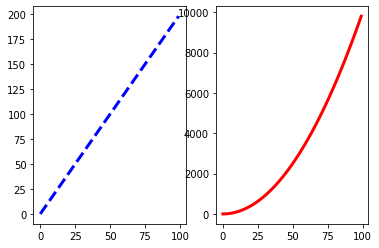

In [4]:
# create a subplot
plt.subplot(1,  # nrows
            2,  # ncols
            1)  # index

# plot the x vs y
plt.plot(x,y,         # data
         lw = 3,      # linewidth
         color = "b", # color = blue
         ls = '--')   # linestyle


# create a second subplot
plt.subplot(1,2,2)

# plot x vs z
plt.plot(x,z,            # data
         lw = 3,         # linewidth
         color = "r",    # color = red
         ls = '-')       # linestyle

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

* Note that subplot and subplots are different functions: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html

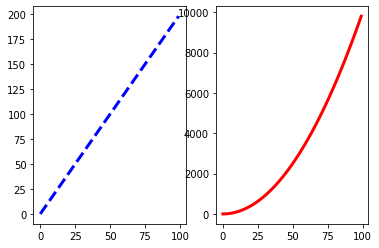

In [5]:
# your code here-2st way
fig, axes = plt.subplots(1, 2)

axes[0].plot(x, y, color = "b", lw = 3, ls = '--')
axes[1].plot(x, z, color = "r", lw = 3, ls = '-')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'z')

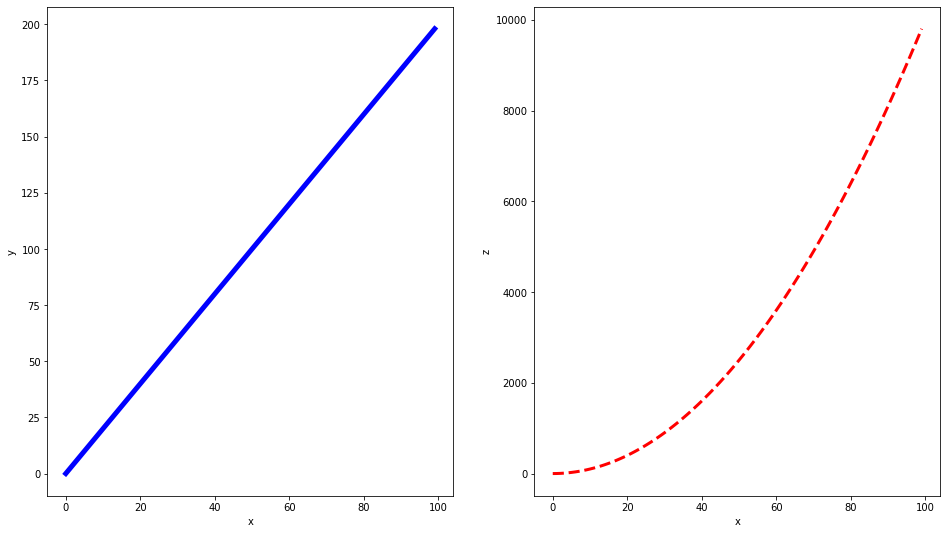

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 9))

axes[0].plot(x,y,color = "blue", lw = 5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].plot(x,z,color = "red", lw = 3, ls = '--')
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

Text(0.5, 1.0, 'Logarithmic scale (y)')

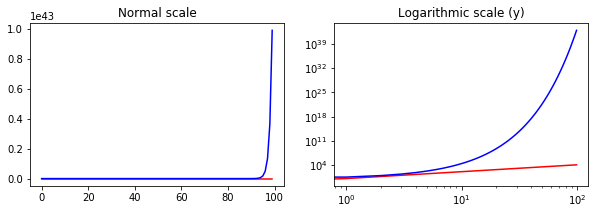

In [7]:
#your code here
fig, axes = plt.subplots(1, 2, figsize=(10,3))
      
axes[0].plot(x, x**2, 'r', x, np.exp(x), 'b')
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, 'r', x, np.exp(x), 'b')
axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_title("Logarithmic scale (y)")

Text(0.5, 1.0, 'Logarithmic scale (y)')

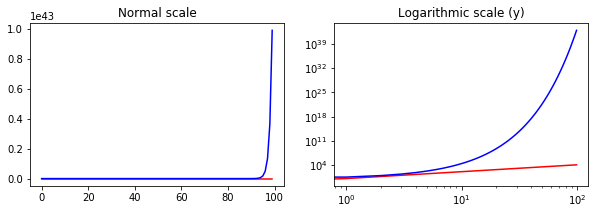

In [8]:
# another way
fig, axes = plt.subplots(1, 2, figsize=(10,3))
      
axes[0].plot(x, x**2, 'r')
axes[0].plot(x, np.exp(x), 'b')
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, 'r')
axes[1].plot(x, np.exp(x), 'b')
axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_title("Logarithmic scale (y)")

#### As a bonus challenge, try to add a legend to the plot.

Text(0.5, 1.0, 'Logarithmic scale (y)')

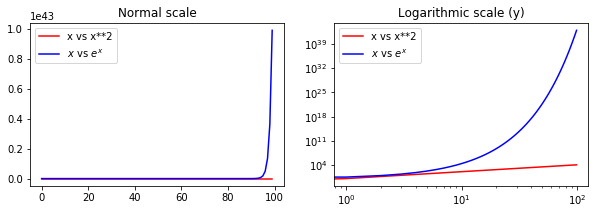

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
      
axes[0].plot(x, x**2, 'r')
axes[0].plot(x, np.exp(x), 'b')
axes[0].set_title("Normal scale")
axes[0].legend(['x vs x**2', '$x$ vs $e^x$'])

axes[1].plot(x, x**2, 'r', label = 'x vs x**2')
axes[1].plot(x, np.exp(x), 'b', label = '$x$ vs $e^x$')
axes[1].legend()
axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_title("Logarithmic scale (y)")

# Challenge 2

#### Import the Fitbit2.csv file and name your dataset fitbit

In [10]:
fitbit=pd.read_csv('../Fitbit2.csv')
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

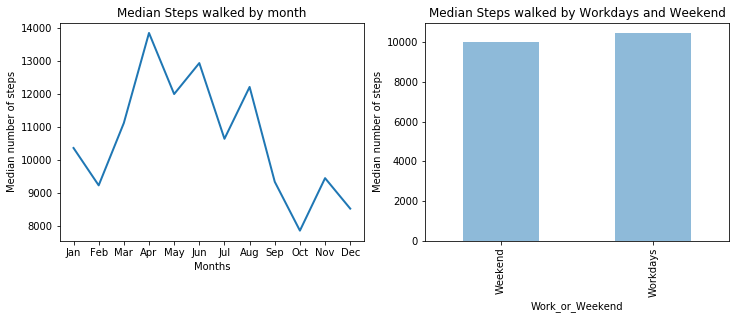

In [11]:
# Median Steps by Month_encoded
weekday_steps = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()
weekday_steps.head(5)

fig,axes = plt.subplots(figsize = (12,4), nrows = 1, ncols = 2)

plt.sca(axes[0])

weekday_steps.plot(kind = 'line',linewidth=2)

plt.ylabel('Median number of steps')
plt.xlabel('Months')
plt.title('Median Steps walked by month')
plt.xticks(list(range(1,13)),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.savefig('steps_months.png',bbox_inches='tight')


# Median Steps by Work_or_Weekend
plt.sca(axes[1])

weekday_steps = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median().sort_values()

weekday_steps.plot(kind = 'bar',alpha = 0.5)

plt.ylabel('Median number of steps')
plt.title('Median Steps walked by Workdays and Weekend')
plt.xticks(list(range(2)),['Weekend','Workdays'])

plt.savefig('steps_work_weekend.png',bbox_inches='tight')

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

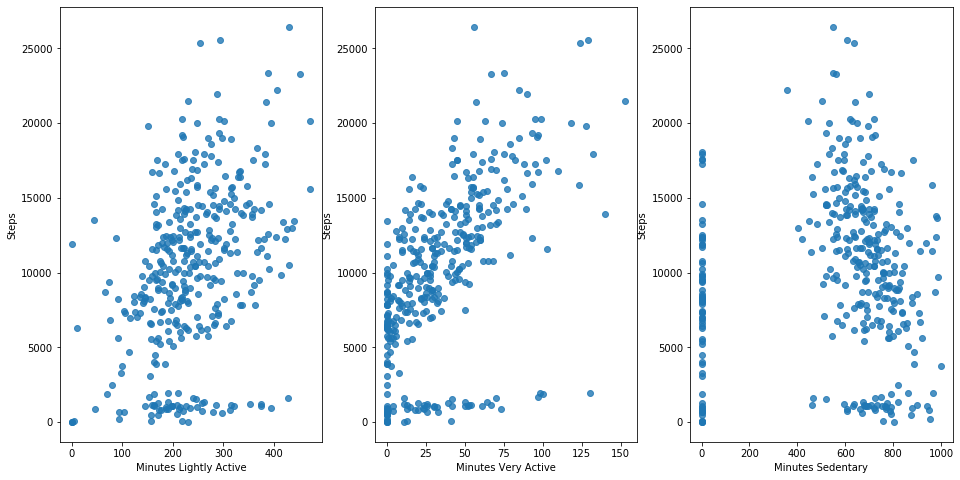

In [12]:
cols=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
df=fitbit[cols]
fig,axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 3)
for i in range(3):
    plt.sca(axes[i])
    plt.scatter(df.iloc[:,i],df['Steps'], alpha = 0.8)
    plt.xlabel(df.iloc[:,i].name)
    plt.ylabel('Steps')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. 
* db: `titanic`
* table: `titanic`

In [13]:
# your code here
import pandas as pd
titanic = pd.read_csv('../titanic.csv',low_memory=False)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [14]:
#your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [15]:
# numerical variable
# your code here-
titanic.select_dtypes(exclude=object).head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250


In [16]:
#your code here- categorical variable
titanic.select_dtypes(exclude=['int','float']).head(3)

,PassengerId,Pclass,Name,Gender,SibSp,Parch,Ticket,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,U0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,U0,S


#### Set the plot style to classic and the figure size to (12,6)
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [17]:
# your code here
plt.style.use('classic')  # matplotlib
sns.set_style('whitegrid') # seaborn

# Figure size change
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of the column Age

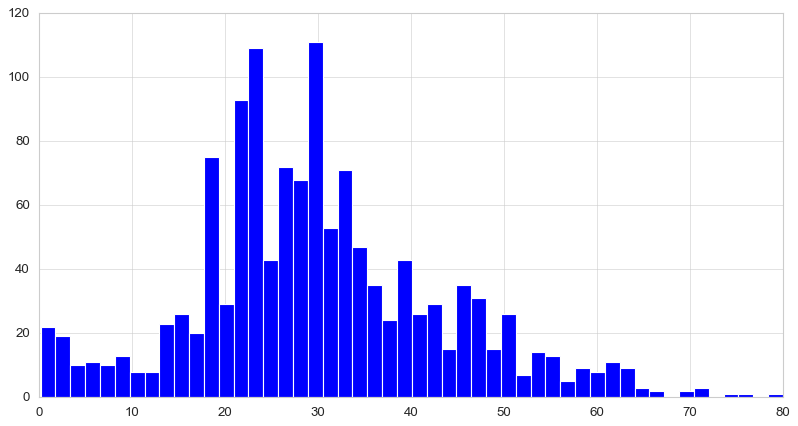

In [18]:
# your code here
titanic['Age'].hist(bins=50)

#### Use subplots and plot the distribution of the Age variable with bins equal to 10,20 and 50.

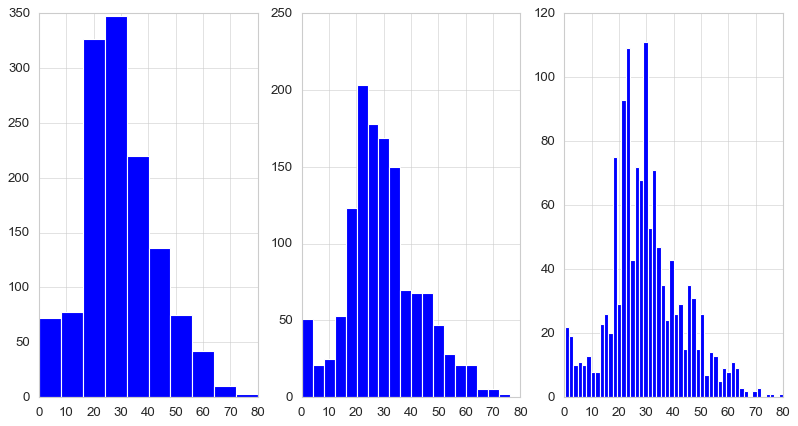

In [19]:
# your code here
plt.subplot(1,3,1)
titanic['Age'].hist(bins = 10)
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50)

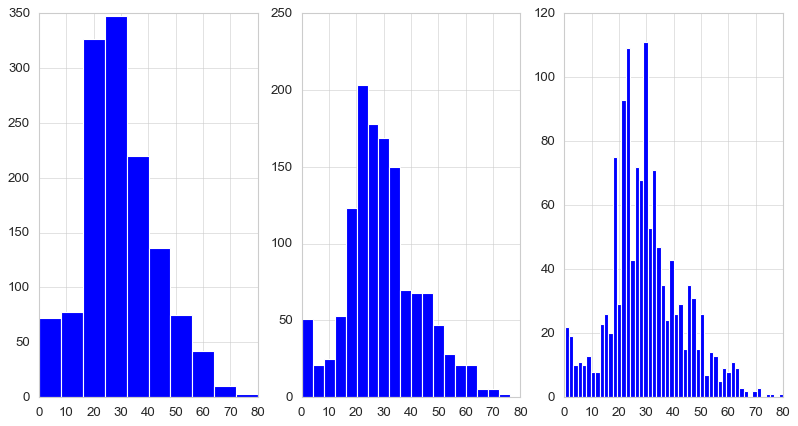

In [20]:
# another way

fig, axes = plt.subplots(1,3)

titanic['Age'].hist(bins = 10, ax = axes[0])
titanic['Age'].hist(bins = 20, ax = axes[1])
titanic['Age'].hist(bins = 50, ax = axes[2])

#### How does the bin size affect your plot? Comment.

In [21]:
#your comment here

#### Use seaborn to show the distribution of the column Age

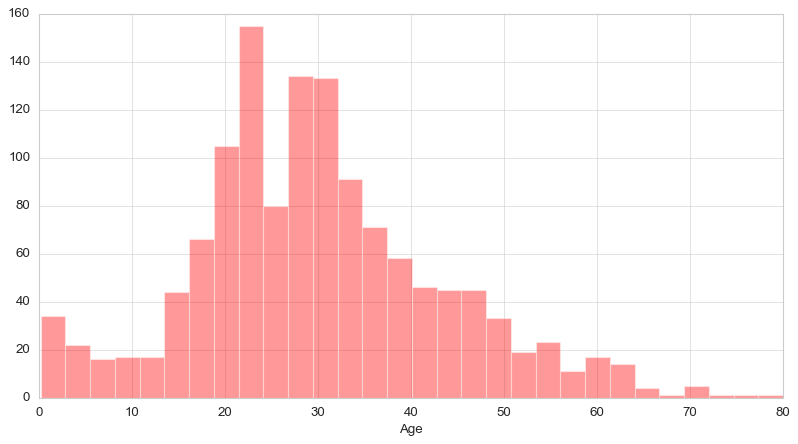

In [22]:
# your code here
sns.distplot(titanic['Age'], bins=30, kde=False, color='red')

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

Text(0, 0.5, 'Count')

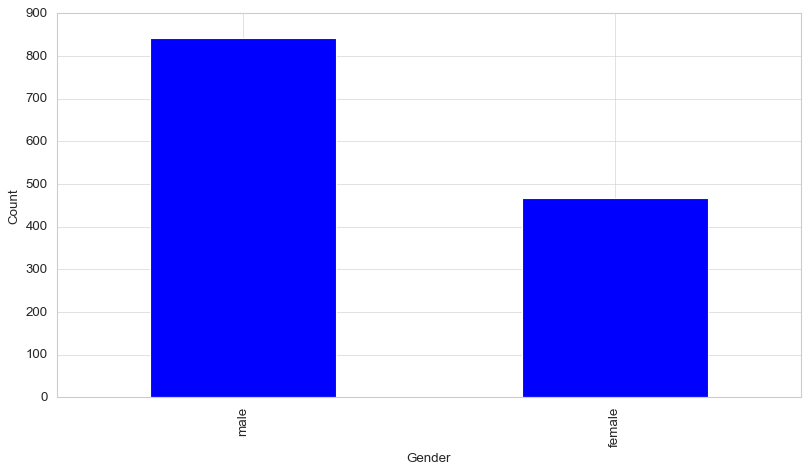

In [23]:
# your code here- 1st way
titanic['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')

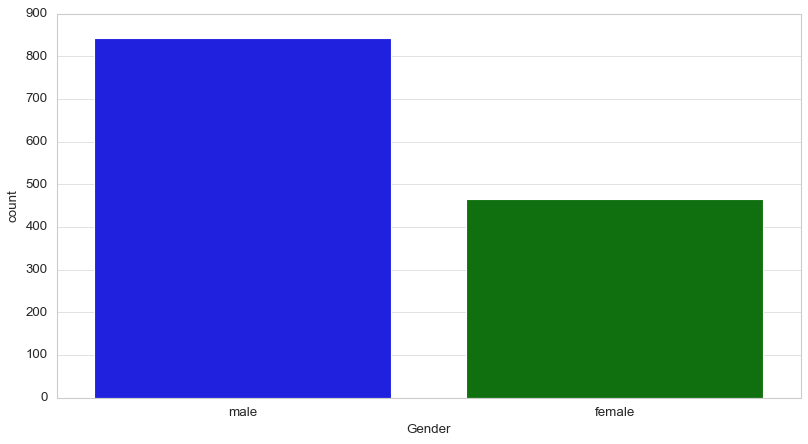

In [24]:
# your code here- 2nd way
sns.countplot(x='Gender',data=titanic)

#### Use the right plot to visualize the column Pclass

Text(0, 0.5, 'Count')

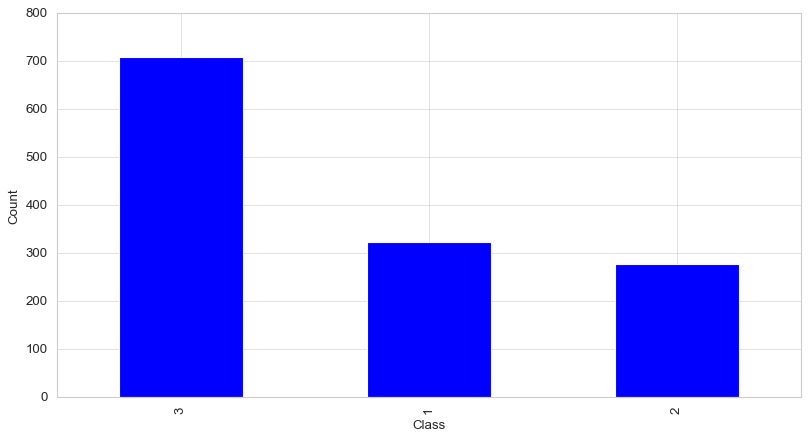

In [25]:
# your code here
titanic['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

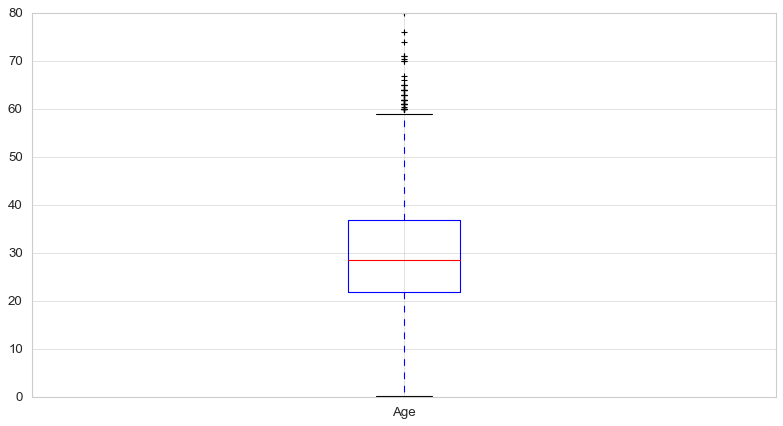

In [26]:
titanic.boxplot(column='Age')

#### What does the last plot tells you about the feature Age? Comment.

In [27]:
# your comment here

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

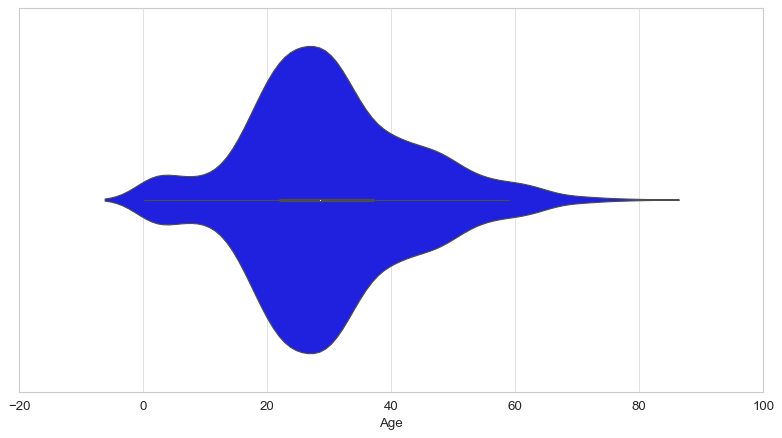

In [28]:
#your code here
sns.violinplot("Age", data=titanic)

#### What additional information the last plot provides you about the feature Age? Comment.

In [29]:
#your comment here

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn

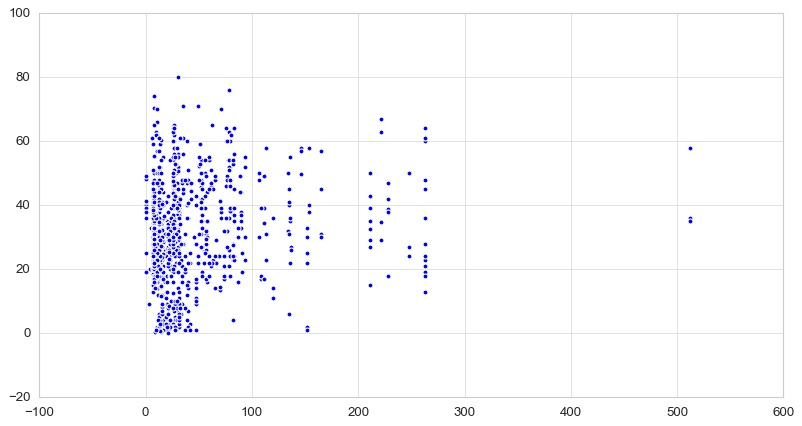

In [30]:
#your code- 1st way

plt.scatter(x = 'Fare', y = 'Age', data = titanic)

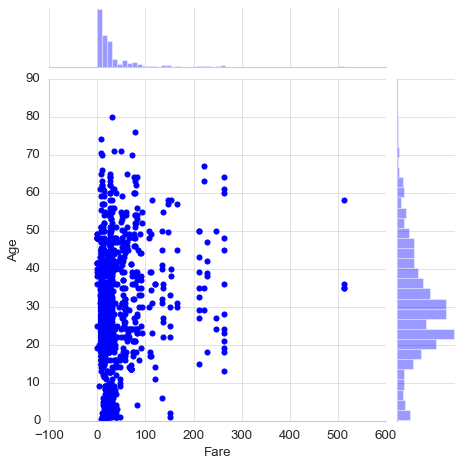

In [31]:
# your code-2nd way
sns.jointplot(x='Fare',y='Age',data=titanic)

#### Plot the correlation matrix using seaborn.

Text(0.5, 1, 'Correlation matrix')

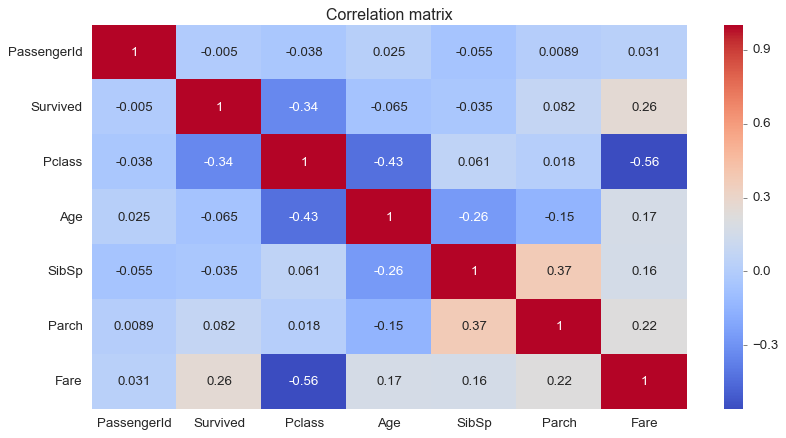

In [32]:
#your code here
sns.heatmap(titanic.corr(), cmap='coolwarm', annot = True)
plt.title('Correlation matrix')

#### What are the most correlated feature? Comment

In [33]:
#your comment here

#### Use the right plot to display the summary statistics of the Age in function of the Pclass

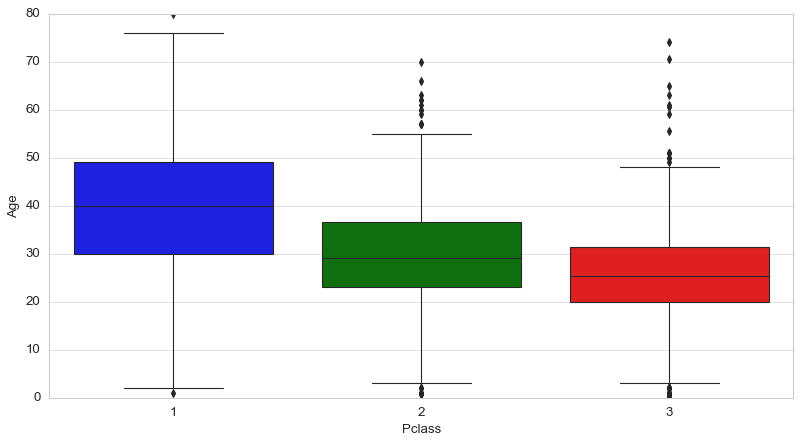

In [34]:
#your code here
sns.boxplot(x='Pclass',y='Age',data=titanic)

#### Use the seaborn to plot the distribution of the Age based on the Gender
Hint: Use Facetgrid

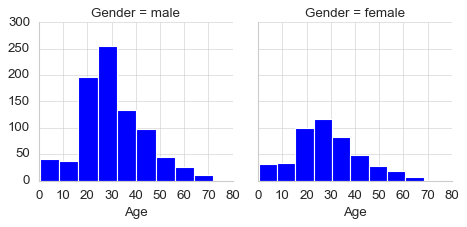

In [35]:
#your code here
g = sns.FacetGrid(data=titanic, col='Gender')
g.map(plt.hist,'Age')